# Flight Price Prediction Project:-

# Problem statement:-

       Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

Import all the required library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing our 2 Dataset:-

In [9]:
#importing train dataset
df=pd.read_excel("C:\Data_Train.xlsx")    

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [18]:
#importing test dataset
dff=pd.read_excel("C:\Test_set.xlsx")

In [20]:
dff.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# Features:-

-Airline: The name of the airline.

-Date_of_Journey: The date of the journey

-Source: The source from which the service begins.

-Destination: The destination where the service ends.

-Route: The route taken by the flight to reach the destination.

-Dep_Time: The time when the journey starts from the source.

-Arrival_Time: Time of arrival at the destination.

-Duration: Total duration of the flight.

-Total_Stops: Total stops between the source and destination.

-Additional_Info: Additional information about the flight
    
-->>Target: Price: The price of the ticket

# Lets discuss about train Dataset:-
    i) Train dataset:-

# Dataset inspection:-

In [21]:
df.shape

(10683, 11)

In [22]:
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 10683 observations with 11 features.


In [23]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# EDA:-

In [24]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [25]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [26]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

as we can see there is a single null value present in Route And total stops

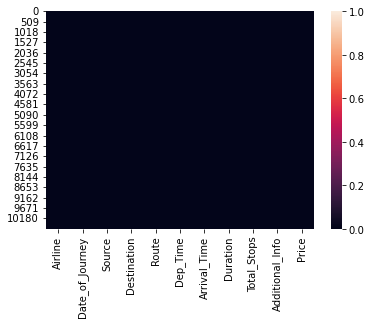

In [30]:
sns.heatmap(df.isnull())
plt.show()

as there is only 2 null values are present soo it is not showing in heatmap

# We use Imputation technique to replace nan values:-

In [31]:
df["Route"]=df["Route"].fillna(df["Route"].mode()[0])
df["Total_Stops"]=df["Total_Stops"].fillna(df["Total_Stops"].mode()[0])

In [33]:
#lets check again 
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

we can see here is no null value are present inside those are replaced

In [36]:
#Checking unique values of target column
df['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

Above are unique code for price column which is our target column

In [37]:
#lets check whether there is empty data or not
df.loc[df['Price']==' ']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


as we can see here is no empty observation in our target column

# Extration of features:-

In [38]:
#we have to convert Date_of_journey, dep_time,Arrival_time which are object type to datetime type

In [39]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [40]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

as we can see Date_of_journey, dep_time,Arrival_time are convert to datetime type

In [41]:
#lets extract Date_of_Journey to date,month and year

In [42]:
#Extracting day
df["Journey_Day"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
#Extracting month
df["Journey_Month"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month
#Extracting year
df["Journey_Year"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.year

In [43]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-06-29 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-06-29 05:50:00,2022-06-29 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-29 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-06-29 18:05:00,2022-06-29 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-06-29 16:50:00,2022-06-29 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [44]:
#now i have to delete Date_of_journey column after extraction
df=df.drop(["Date_of_Journey"],axis=1)

In [45]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-06-29 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-06-29 05:50:00,2022-06-29 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-29 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-06-29 18:05:00,2022-06-29 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-06-29 16:50:00,2022-06-29 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


This perticular Duration column is the difference between Arrival_time and Dep_time but the given Duration is not in format (i.e.,-h-m) so let me extract proper duration column from the Arrival_time and Dep_time.

In [46]:
#Extracting Duration column
Diff=(df["Arrival_Time"]-df["Dep_Time"])
Diff_list=list()
for i in range(len(Diff)):
    duration=Diff.iloc[i].seconds/3600
    Diff_list.append(duration)
df["Duration"]=Diff_list

In [47]:
#Extracting Dep_time
df["Dep_Hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_Min"]=pd.to_datetime(df["Dep_Time"]).dt.minute

In [51]:
#As we are extract from dep_time soo there is no need of that column soo we have to drop that column

In [48]:
df=df.drop(["Dep_Time"],axis=1)

In [49]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2.833333,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-06-29 13:15:00,7.416667,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-10 04:25:00,19.000000,2 stops,No info,13882,6,9,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-06-29 23:30:00,5.416667,1 stop,No info,6218,5,12,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-06-29 21:35:00,4.750000,1 stop,No info,13302,3,1,2019,16,50


In [50]:
#Extracting Arrival_Time ccolumn
df["Arrival_Hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_Min"]=pd.to_datetime(df["Arrival_Time"]).dt.minute

In [52]:
#as we are extracting Arrival_time soo here is no need of that column.so i have to delete that column

In [53]:
df=df.drop(["Arrival_Time"],axis=1)

In [54]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2.833333,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7.416667,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19.000000,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.416667,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4.750000,1 stop,No info,13302,3,1,2019,16,50,21,35


# Lets check the value counts of those columns of our dataset:-

In [55]:
for i in df.columns:
        print(df[i].value_counts())
        print('***************************')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
***************************
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
***************************
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
***************************
DEL → BOM → COK          2377
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD   

we can see in journey year column there is only one value i.e 2019 as we kno this dataet is for 2019 soo we have to delete that column

In [56]:
df = df.drop(["Journey_Year"],axis=1)

# Feature Engineering:-

In [57]:
#Feature["Airline"]
df["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)
df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)
df["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [58]:
#destination
df["Destination"].replace("New Delhi","Delhi",inplace=True)

In [59]:
#Additional_Info
df["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)
df["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)
df["Additional_Info"].replace("No Info","No info",inplace=True)

In [60]:
#total_stops
df.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace = True)

In [62]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,2.833333,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7.416667,2,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19.000000,2,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.416667,1,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4.750000,1,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2.500000,0,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2.583333,0,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3.000000,0,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,Delhi,BLR → DEL,2.666667,0,No info,12648,3,1,11,30,14,10


we have successfully extracting and featuring those data

# Data Description:-

In [63]:
df.describe()

,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,8.206754,0.824207,9087.064121,12.682205,5.534775,12.490686,24.411214,13.348778,24.690630
std,6.387288,0.675199,4611.359167,8.803701,2.987489,5.748650,18.767980,6.859125,16.506036
min,0.000000,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.750000,0.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,6.333333,1.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,12.583333,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,23.916667,4.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


In [64]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min'],
      dtype='object')

# Find catagorical & numerical data:-

In [65]:
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


We can see above are the list of categorical columns.

In [66]:
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Duration', 'Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


we can see above are the list of numerical columns.

# Data Visualization:-

# Univariate Analysis:-

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64


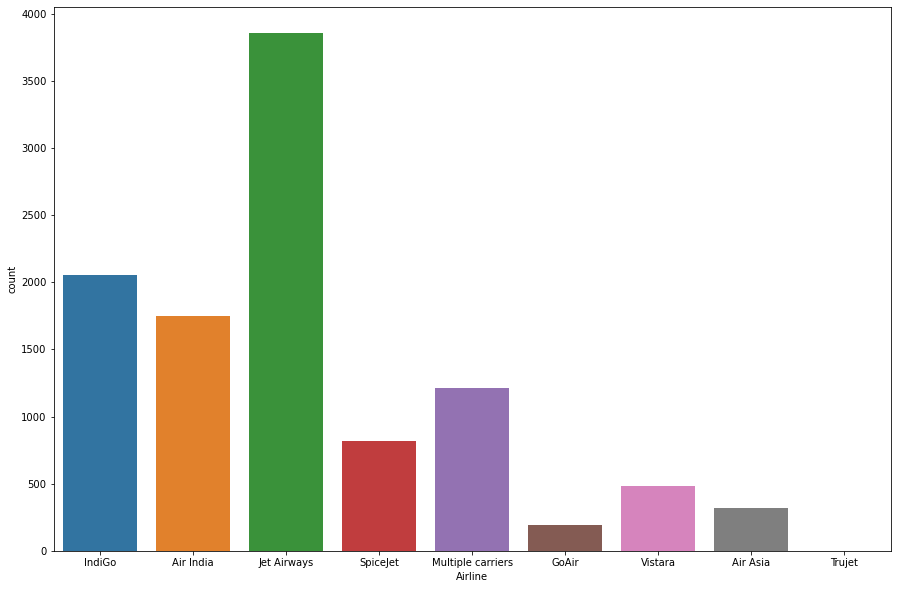

In [69]:
plt.figure(figsize=(15,10))
print(df["Airline"].value_counts())  
sns.countplot(df["Airline"])
plt.show()

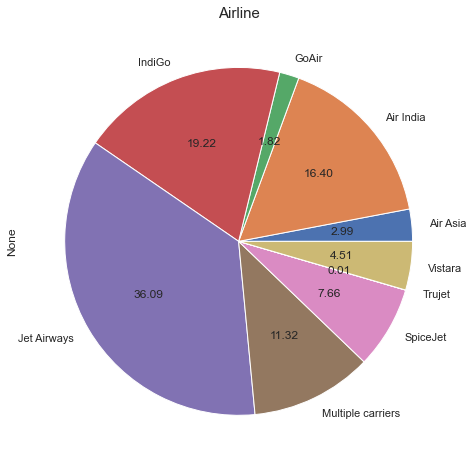

In [70]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
df.groupby("Airline").size().plot(kind='pie', autopct='%.2f')
plt.title("Airline", fontsize=15)
plt.show()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


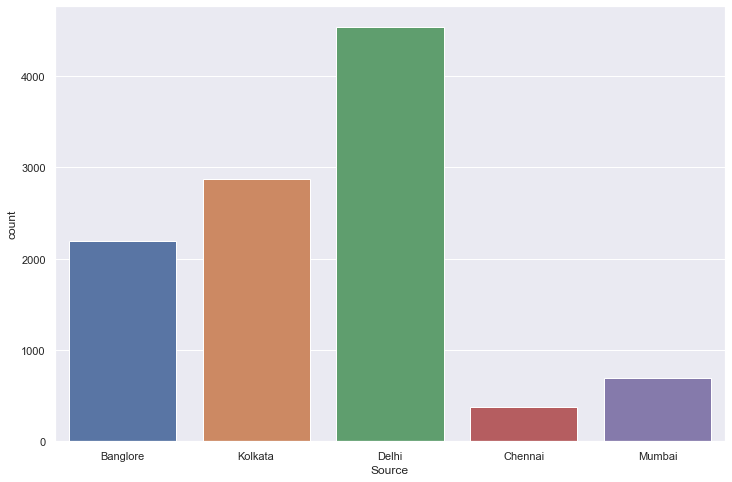

In [72]:
plt.figure(figsize=(12,8))
print(df['Source'].value_counts())  
sns.countplot(df['Source'])
plt.show()

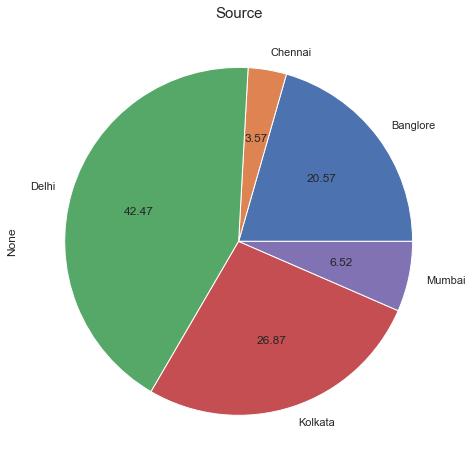

In [73]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
df.groupby('Source').size().plot(kind='pie', autopct='%.2f')
plt.title('Source', fontsize=15)
plt.show()

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


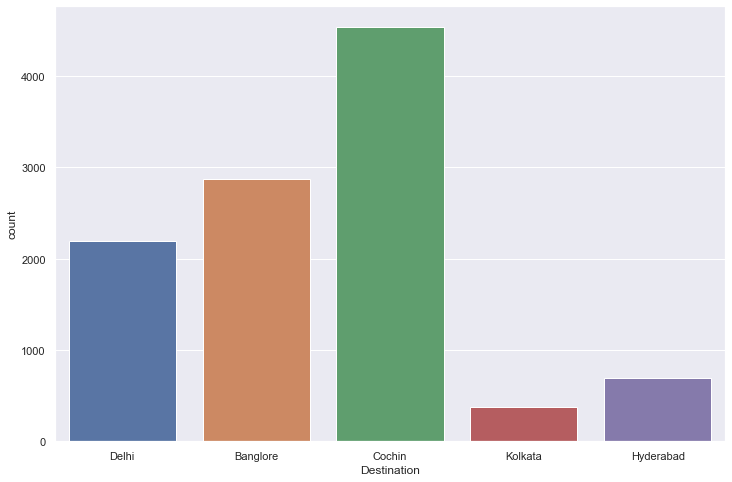

In [74]:
plt.figure(figsize=(12,8))
print(df['Destination'].value_counts())  
sns.countplot(df['Destination'])
plt.show()

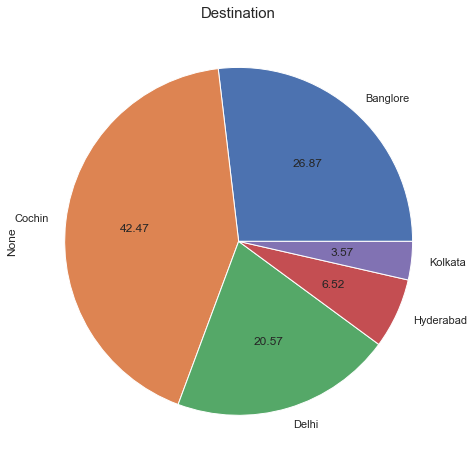

In [75]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
df.groupby('Destination').size().plot(kind='pie', autopct='%.2f')
plt.title('Destination', fontsize=15)
plt.show()

DEL → BOM → COK          2377
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64


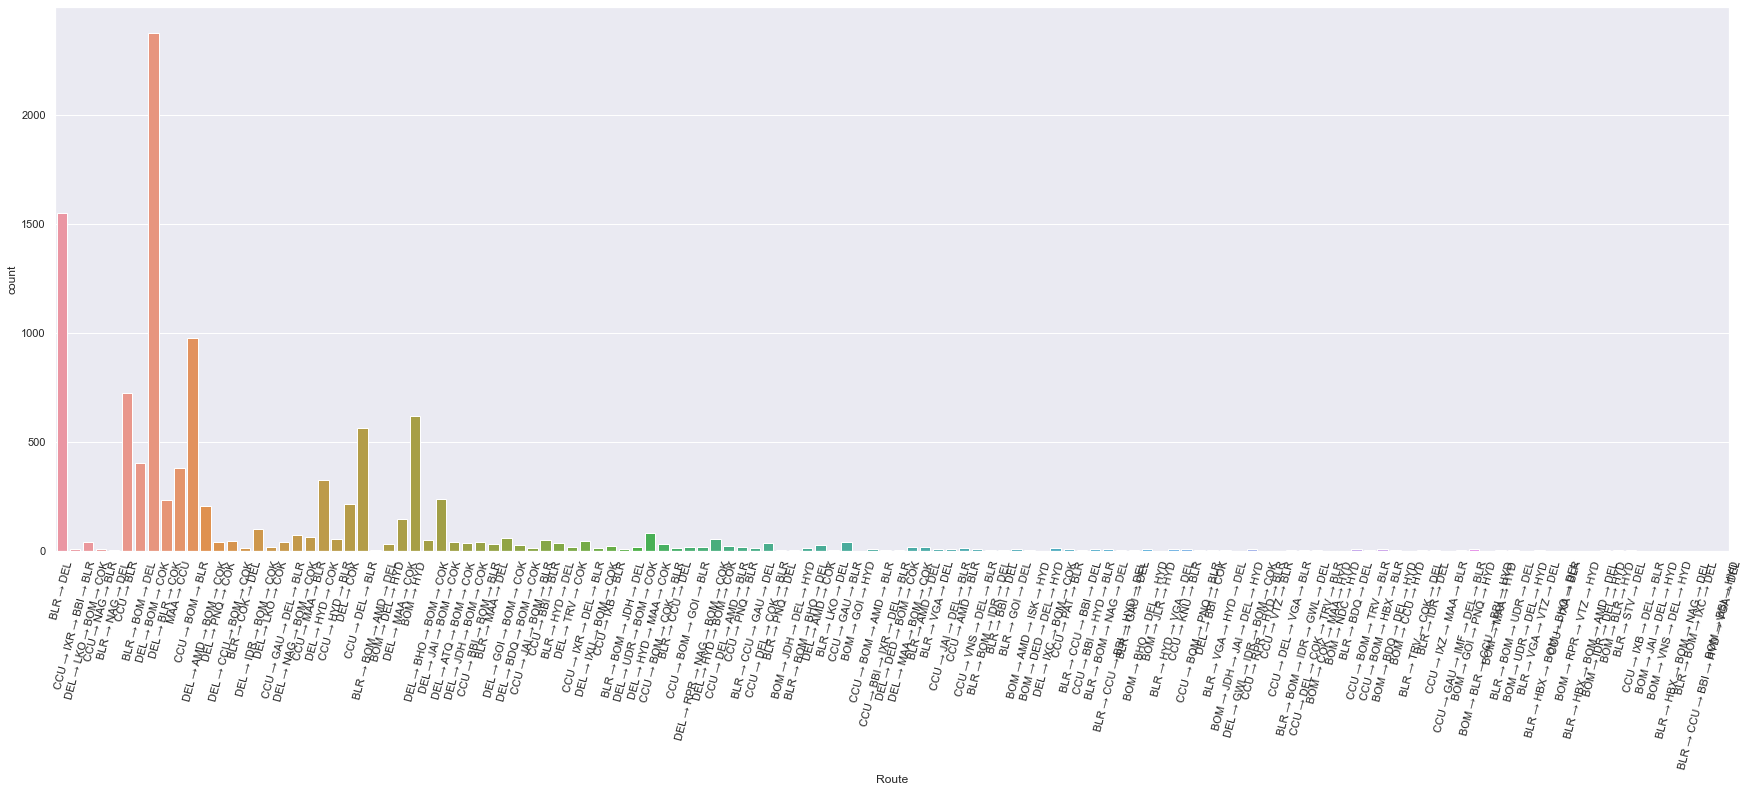

In [80]:
plt.figure(figsize=(30,10))
print(df['Route'].value_counts())  
sns.countplot(df['Route'])
plt.xticks(rotation=75)
plt.show()

We can see that maxm no of people choose 'DEL → BOM → COK' as there route.

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
Long layover                      20
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64


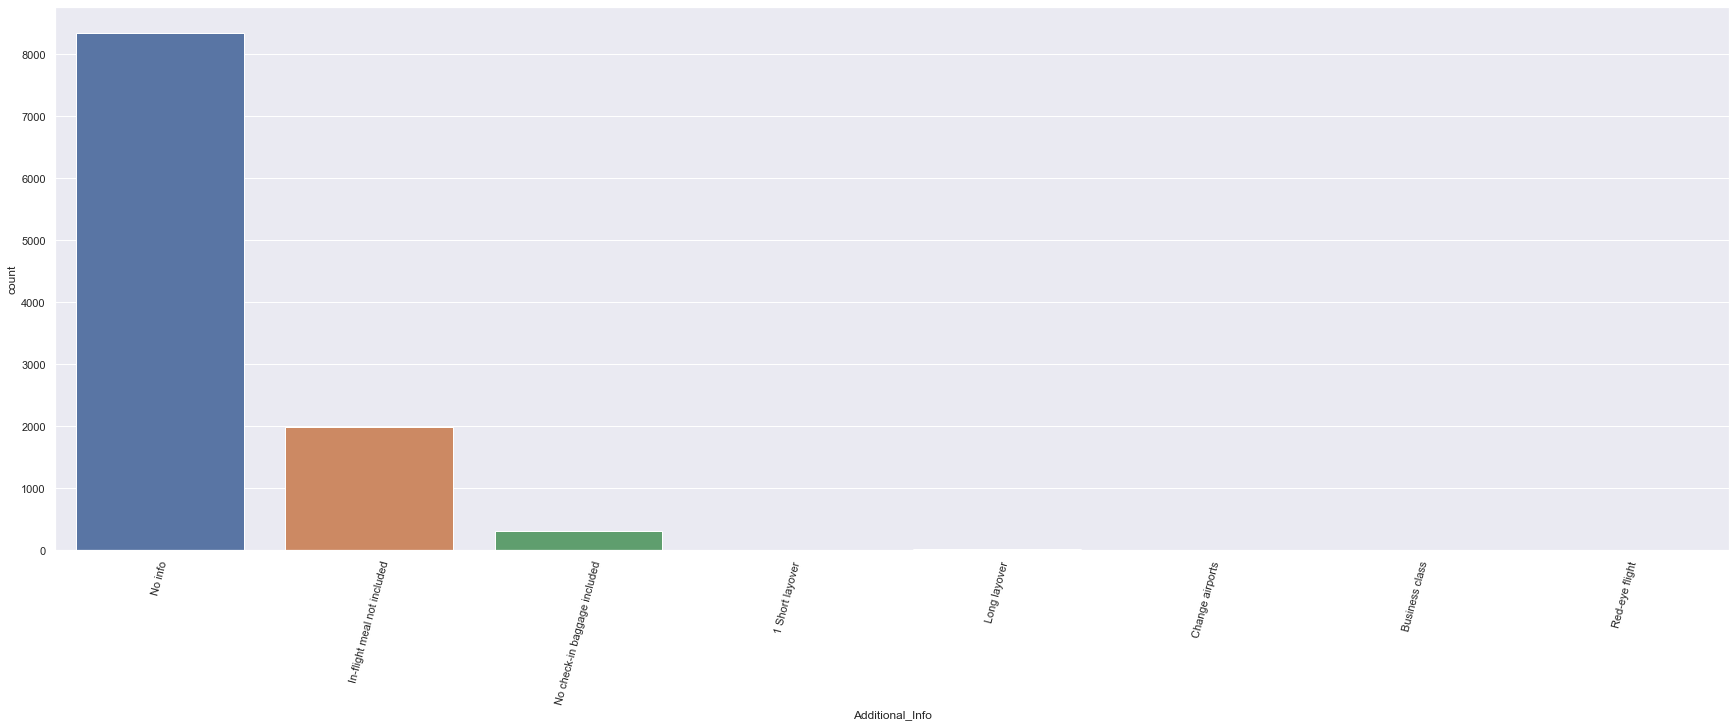

In [81]:
plt.figure(figsize=(30,10))
print(df['Additional_Info'].value_counts())  
sns.countplot(df['Additional_Info'])
plt.xticks(rotation=75)
plt.show()

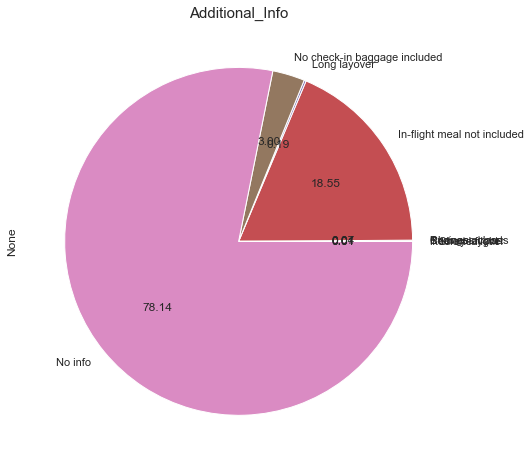

In [82]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
df.groupby('Additional_Info').size().plot(kind='pie', autopct='%.2f')
plt.title('Additional_Info', fontsize=15)
plt.show()

-As we can see in most flights additional_info is not given i.e No info

Distribution plot:-(numerical_columns):-

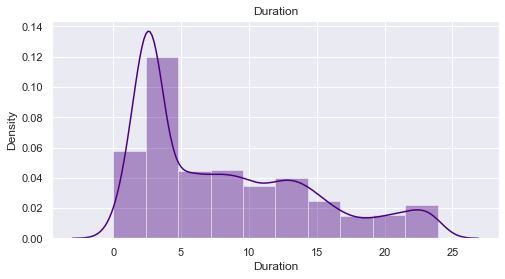

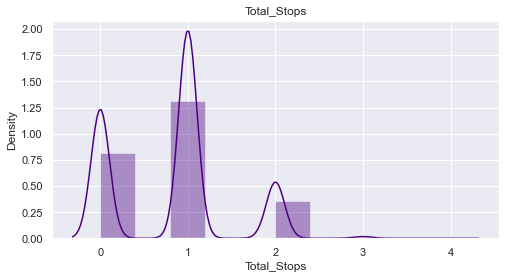

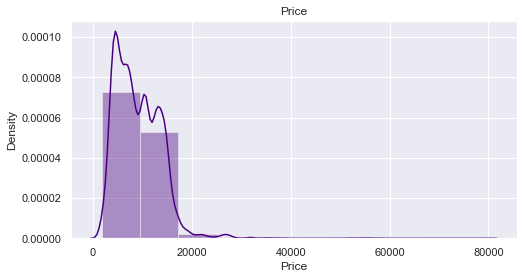

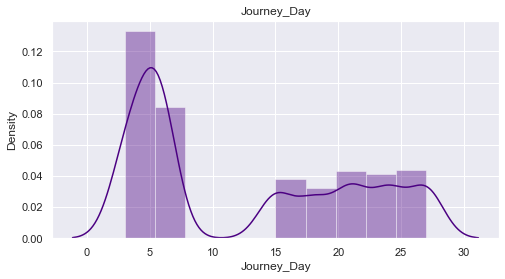

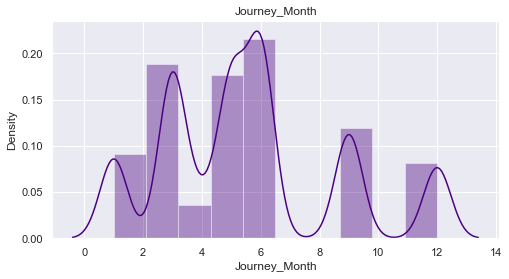

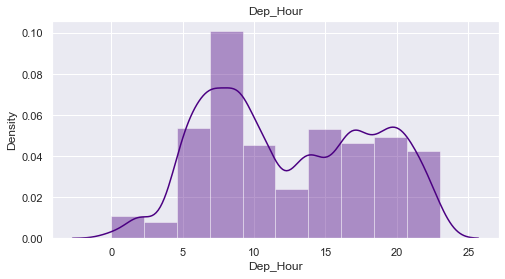

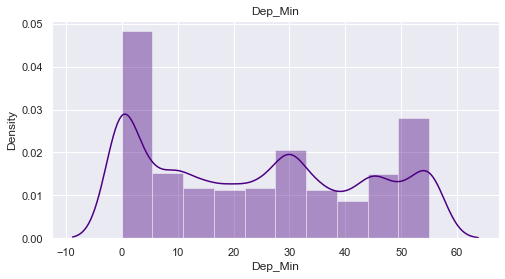

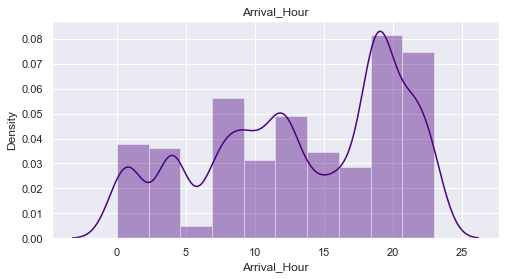

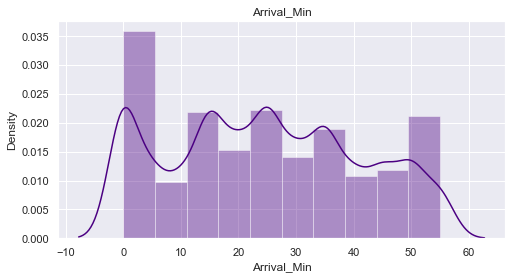

In [85]:
for i in df[numerical_columns]:              
    plt.figure(figsize=(8,4))
    sns.distplot(df[i],bins=10,color="indigo")
    plt.title(i)
    plt.show()

As we can see there is some skewness in some of the columns.i have to remove that later

# Bivariate Analysis:-

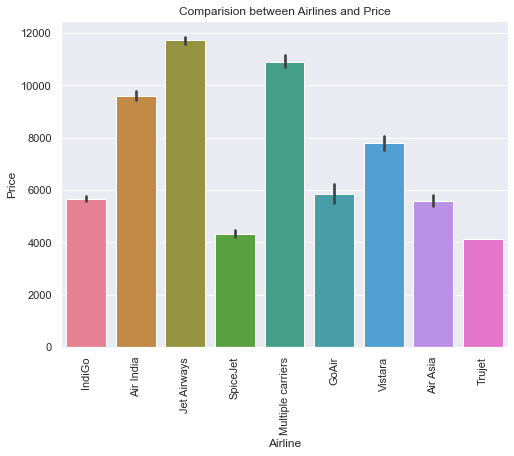

In [86]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Airlines and Price')
sns.barplot(df['Airline'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

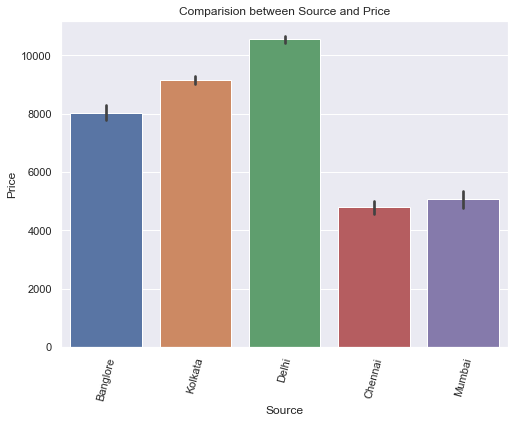

In [87]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Source and Price')
sns.barplot(df['Source'],df['Price'],data=df)
plt.xticks(rotation=75)
plt.show()

<AxesSubplot:title={'center':'Comparision between Duration and Total_Stops'}, xlabel='Duration', ylabel='Total_Stops'>

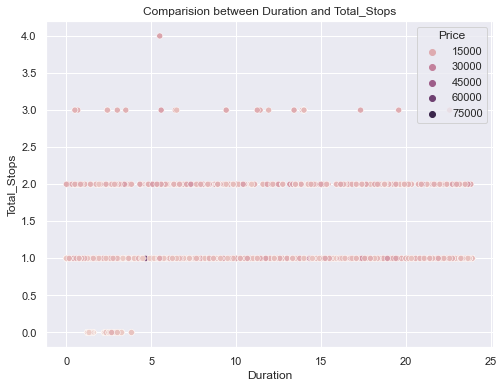

In [90]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Duration and Total_Stops')
sns.scatterplot(df['Duration'],df['Total_Stops'],hue=df['Price'])

Maxm all the airlines have 1 or 2 stops.

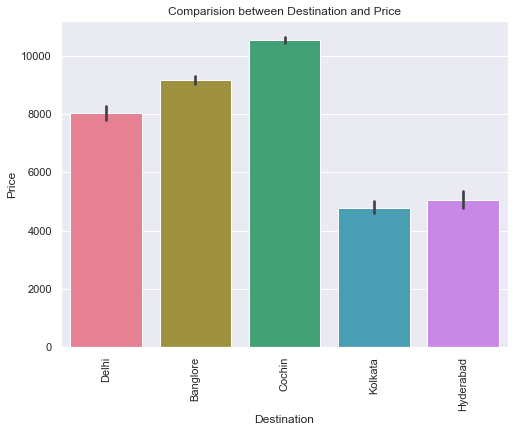

In [92]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Destination and Price')
sns.barplot(df['Destination'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

As we can see if Cochin is the destination then the price is more compared to other airlines.

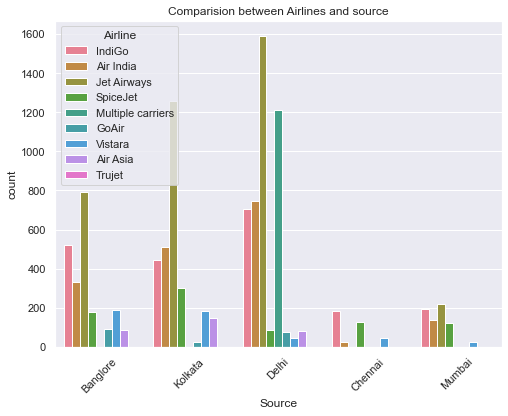

In [99]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Airlines and source')
sns.countplot(df['Source'],hue="Airline",data=df,palette="husl")
plt.xticks(rotation=45)
plt.show()

We can see people prefer Jet Airways more as compare to other airline in all source except Chennai

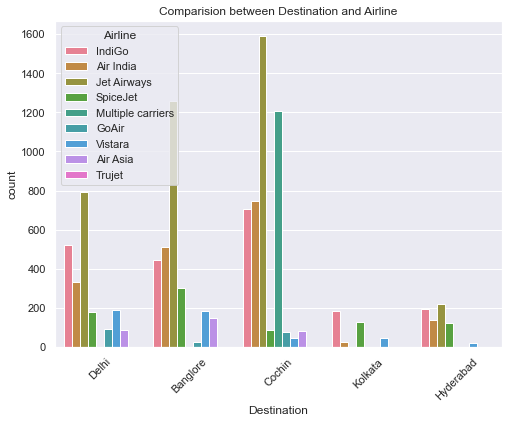

In [100]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Destination and Airline')
sns.countplot(x="Destination",hue="Airline",data=df,palette="husl")
plt.xticks(rotation=45)
plt.show()

As we can see Cochin is the maximum destination with maximum count for Jet Airways which means Jet Airways is famous in those destinations.

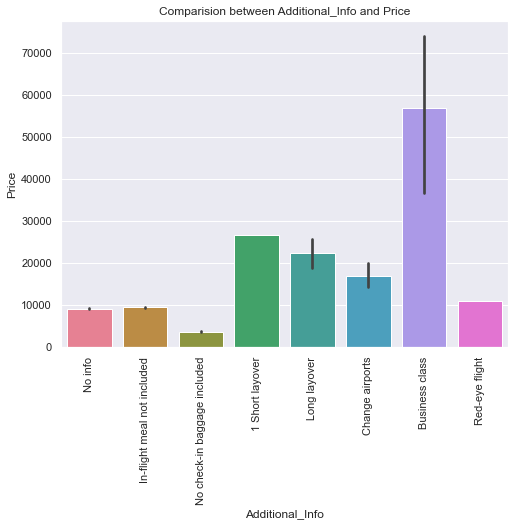

In [104]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Additional_Info and Price')
sns.barplot(df['Additional_Info'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

-We can see in above fig tht for business class the price is very high.
-And for No checkin baggage included the price is very low.


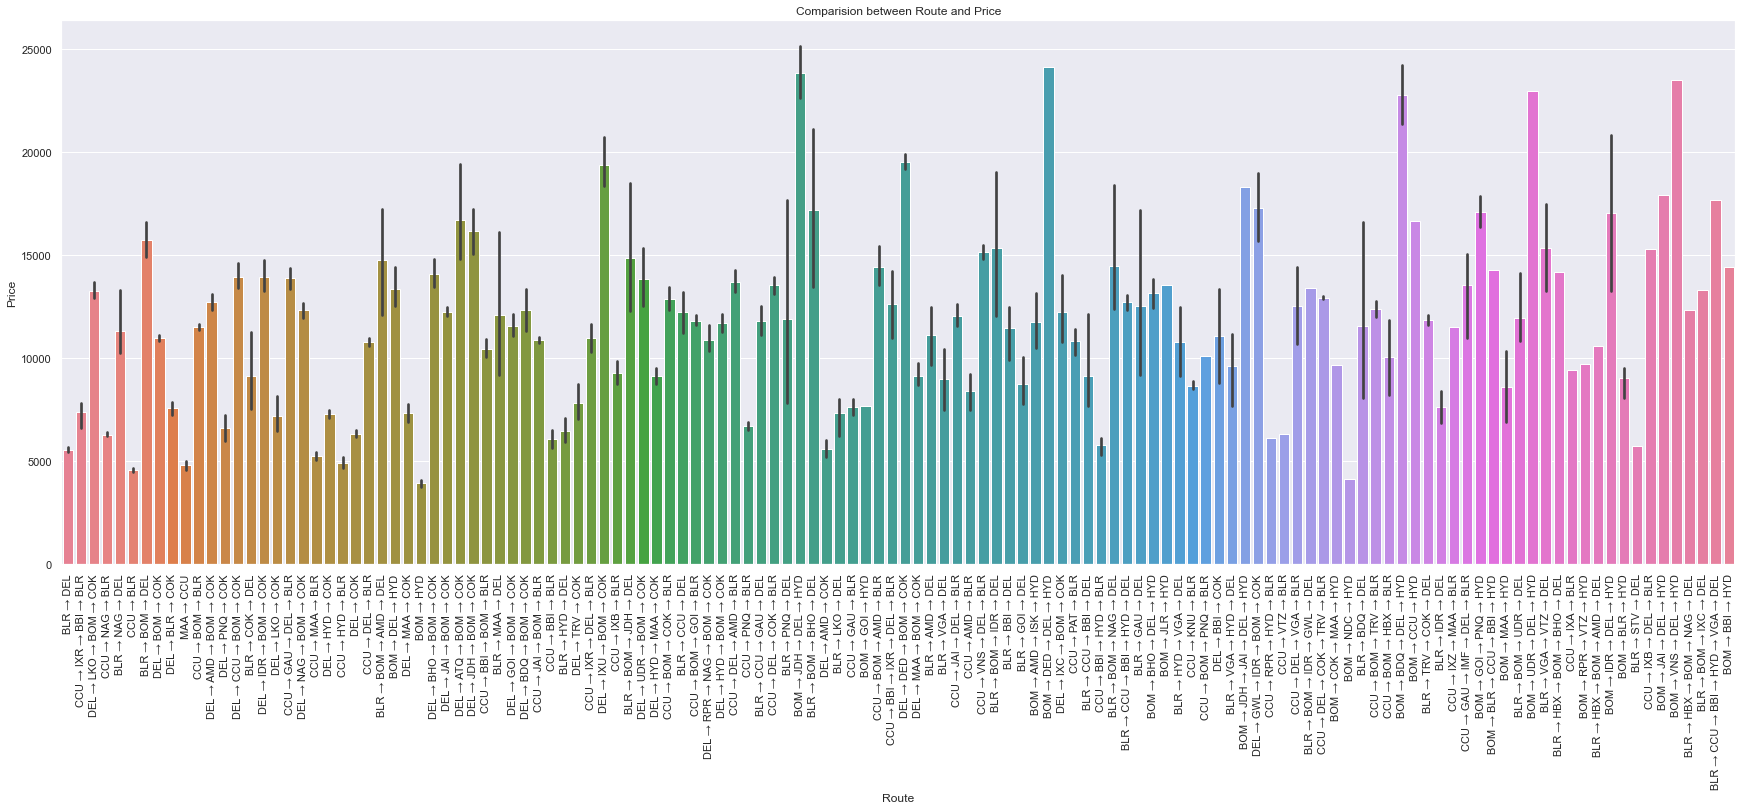

In [103]:
plt.figure(figsize=[30,10])
plt.title('Comparision between Route and Price')
sns.barplot(df['Route'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

We can see, 
BOM->JDH->DEL->HYD, BOM->DED->DEL->HYD and BOM->BOQ->DEL->HYD Routes has maximum price compared to other routes.

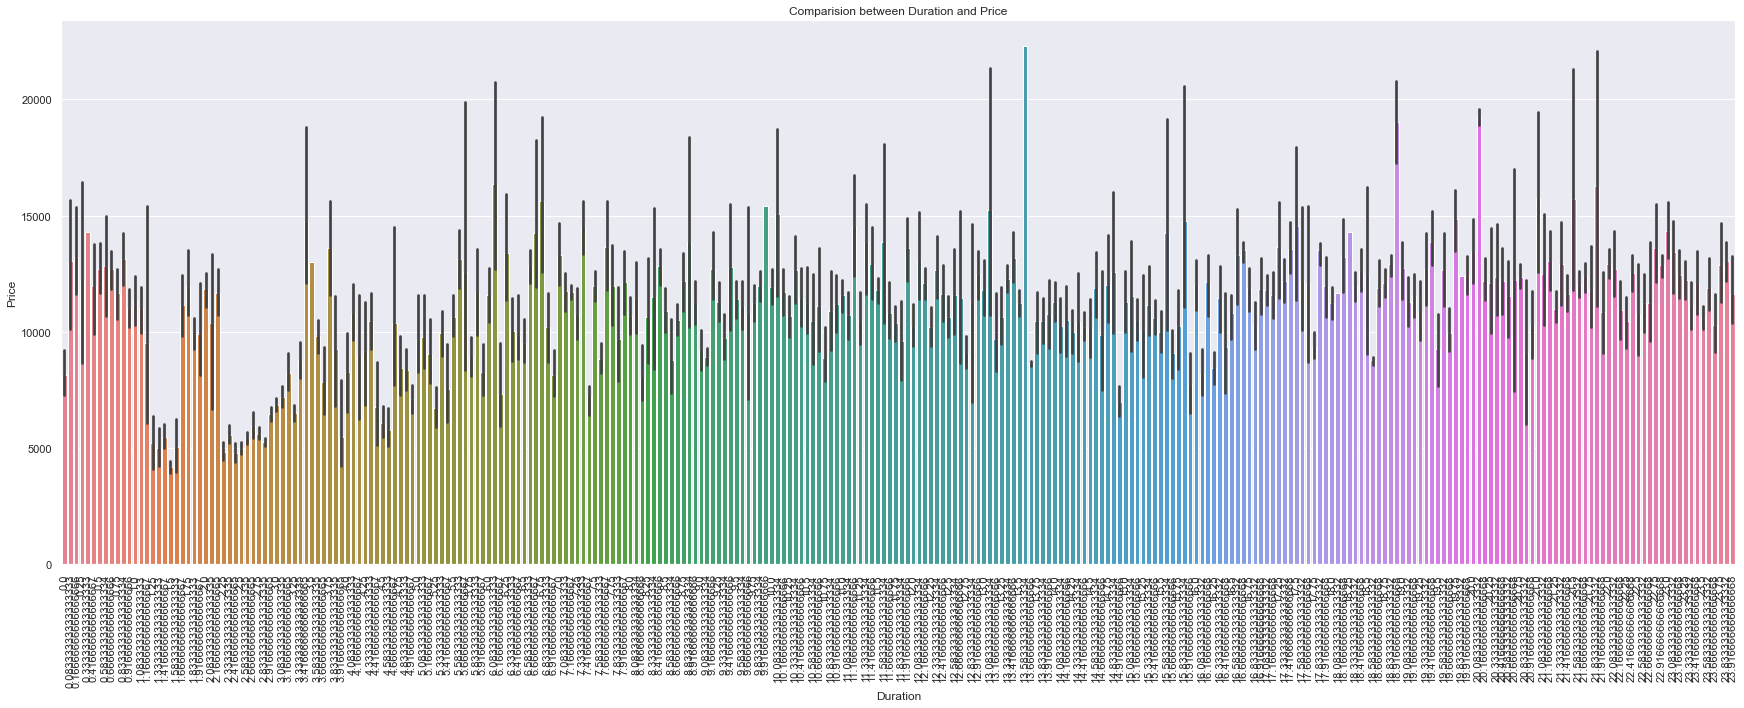

In [108]:
plt.figure(figsize=[30,10])
plt.title('Comparision between Duration and Price')
sns.barplot(df['Duration'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

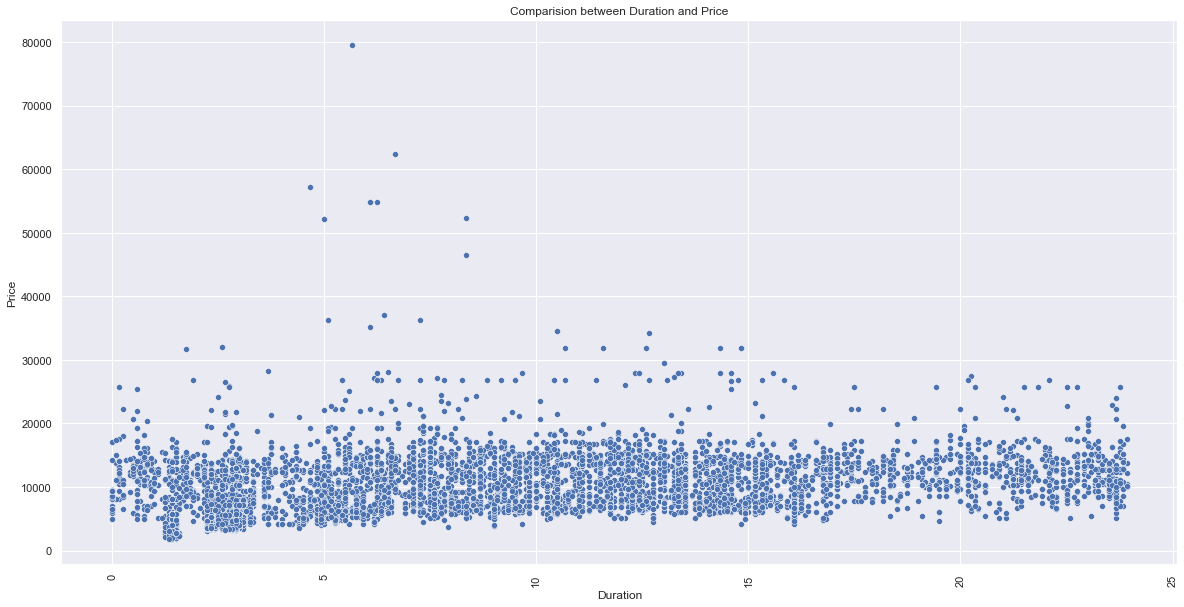

In [109]:
plt.figure(figsize=[20,10])
plt.title('Comparision between Duration and Price')
sns.scatterplot(df['Duration'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

For all the Durations the price range is almost same.

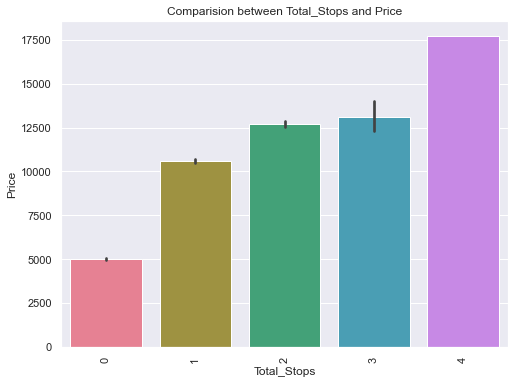

In [110]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Total_Stops and Price')
sns.barplot(df['Total_Stops'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

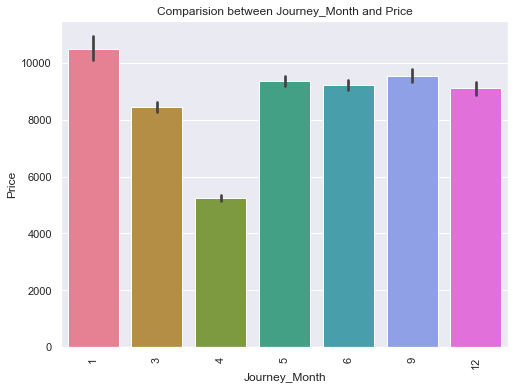

In [111]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Journey_Month and Price')
sns.barplot(df['Journey_Month'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

In ab0ve fig we can see in jan the price is high in airlines where in April the price is low as compare to other months

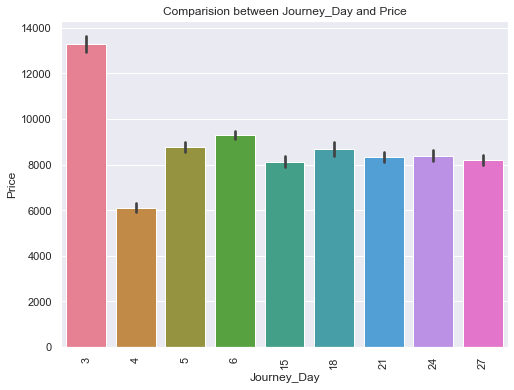

In [112]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Journey_Day and Price')
sns.barplot(df['Journey_Day'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

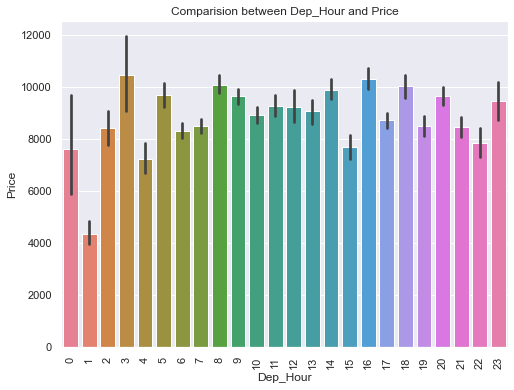

In [113]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Dep_Hour and Price')
sns.barplot(df['Dep_Hour'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

It has no relation with price

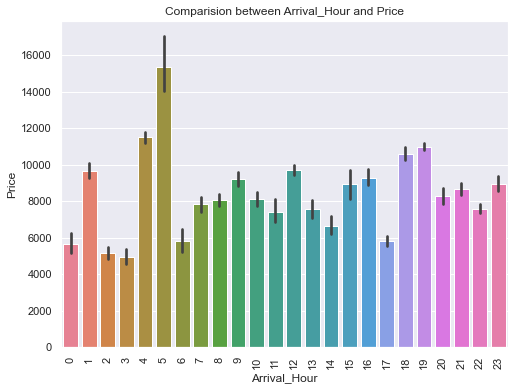

In [115]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Arrival_Hour and Price')
sns.barplot(df['Arrival_Hour'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

It has also no relation with price.But we can see when the arrival hours is 5 the price is high

# Checking Outliers:-

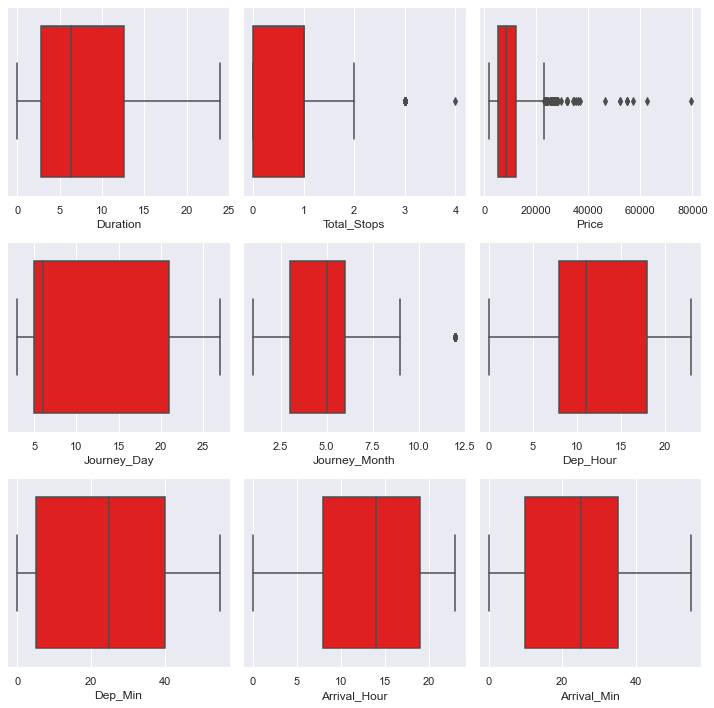

In [122]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="red")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

Duration            AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total_Stops      AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Price             AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Journey_Day      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Journey_Month    AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Dep_Hour            AxesSubplot(0.125,0.593621;0.133621x0.130172)
Dep_Min          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Arrival_Hour      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Arrival_Min      AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

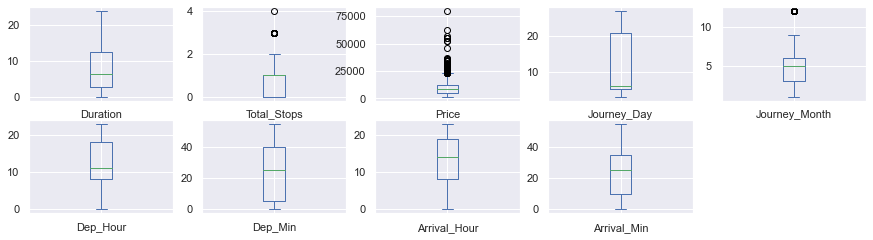

In [123]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,10))

we can see there is outliers present in Total_Stops,Price,Journey_Month columns
-Price is my target i should not remove outliers from this column.And Total_Stops is a categorical column So i should not remove outliers here also.

# Removing outliers:-

# i)Using Zscore method:-

In [124]:
features=df[['Journey_Month']]

this is the only column with outliers

In [126]:
from scipy.stats import zscore

In [128]:
z=np.abs(zscore(features))
z

,Journey_Month
0,0.848503
1,1.517993
2,1.159966
3,2.164201
4,1.517993
...,...
10678,1.159966
10679,0.513758
10680,0.513758
10681,1.517993


In [129]:
df_new=df[(z<3).all(axis=1)]
df_new

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,2.833333,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7.416667,2,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19.000000,2,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.416667,1,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4.750000,1,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2.500000,0,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2.583333,0,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3.000000,0,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,Delhi,BLR → DEL,2.666667,0,No info,12648,3,1,11,30,14,10


I have removed the skewness using zscore method.

In [130]:
df_new.shape

(10683, 14)

In [131]:
df.shape

(10683, 14)

In my old dataset i have 10683 rows and 14 columns.
There is no dataloss in zscore method which means it has not removed any outliers

# ii) IQR (Inter Quantile Range) method:-

In [134]:
# 1st quantile
Q1=features.quantile(0.25)
# 3rd quantile
Q3=features.quantile(0.75)
# IQR
IQR=Q3-Q1
df_1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

I have removed the skewness using IQR method.

In [135]:
df_1.shape

(9726, 14)

In [136]:
df.shape

(10683, 14)

In my old dataset i have 10683 rows and 14 columns.

# % of dataloss:-

In [137]:
Dataloss=(((10683-9726)/10683)*100)
Dataloss

8.958157820836844

In IQR method the data loss is less than 10% so i can use IQR method to remove outliers.

# Checking for skewness:-

In [138]:
df_1.skew()

Duration         0.851356
Total_Stops      0.315096
Price            1.892394
Journey_Day      0.205870
Journey_Month    0.179871
Dep_Hour         0.123756
Dep_Min          0.177822
Arrival_Hour    -0.374118
Arrival_Min      0.111059
dtype: float64

-We can see There is skewness in Duration and Price.Since Price is my target i should not remove skewness in that column since i don't want my target to get manupulated.

# Removing skewness using yeo-johnson method:-

In [139]:
fea=["Duration"]

Taking a list as fea with all the columns with skewness.

In [141]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')

In [142]:
df_1[fea]=scaler.fit_transform(df_1[fea].values)

Got removed from skewness.

In [143]:
df_1[fea].skew()

Duration    0.000721
dtype: float64

<AxesSubplot:xlabel='Duration', ylabel='Density'>

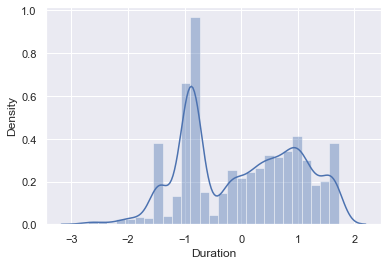

In [144]:
sns.distplot(df_1['Duration'])

It looks like the skewness is reduced.

# Encoding the categorical columns using Label Encoding:-

In [145]:
cat_col=[]
for i in df_1.dtypes.index:
    if df_1.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


In [146]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_1[cat_col]= df_1[cat_col].apply(LE.fit_transform)

In [147]:
df_1[cat_col].head()

,Airline,Source,Destination,Route,Additional_Info
0,3,0,2,16,6
1,1,3,0,78,6
2,4,2,1,112,6
4,3,0,2,27,6
5,6,3,0,58,6


Using label encoder i have encoded the categorical columns.

# Checking correlation:-

In [150]:
corr=df_1.corr()
corr

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.011183,0.060652,0.017397,-0.028970,-0.172712,-0.146616,0.020880,0.025750,0.008746,-0.024661,-0.067040,-0.014642,-0.083493
Source,-0.011183,1.000000,-0.428689,0.385694,0.067225,0.189680,-0.042452,0.010360,0.009863,0.071145,0.064645,-0.045119,0.023022,0.018436
Destination,0.060652,-0.428689,1.000000,-0.210140,-0.392358,-0.425690,0.076846,-0.263846,0.003989,-0.072687,-0.087151,0.091917,-0.059000,0.006345
Route,0.017397,0.385694,-0.210140,1.000000,0.338264,0.470162,0.017851,0.170346,0.076424,0.131410,-0.074617,-0.054603,0.016679,-0.177685
Duration,-0.028970,0.067225,-0.392358,0.338264,1.000000,0.621815,-0.129913,0.474787,-0.022784,0.064575,-0.031530,-0.041839,0.011640,-0.151809
Total_Stops,-0.172712,0.189680,-0.425690,0.470162,0.621815,1.000000,-0.083619,0.596254,-0.022166,0.076029,-0.060973,-0.007590,0.040415,-0.108505
Additional_Info,-0.146616,-0.042452,0.076846,0.017851,-0.129913,-0.083619,1.000000,-0.042563,-0.036811,-0.018736,-0.043188,-0.007537,0.030537,0.041405
Price,0.020880,0.010360,-0.263846,0.170346,0.474787,0.596254,-0.042563,1.000000,-0.175841,0.013499,0.007035,-0.030633,0.021683,-0.083728
Journey_Day,0.025750,0.009863,0.003989,0.076424,-0.022784,-0.022166,-0.036811,-0.175841,1.000000,-0.117084,0.006146,-0.006040,-0.000101,-0.019700
Journey_Month,0.008746,0.071145,-0.072687,0.131410,0.064575,0.076029,-0.018736,0.013499,-0.117084,1.000000,0.015338,-0.027075,-0.012621,-0.046453


<AxesSubplot:>

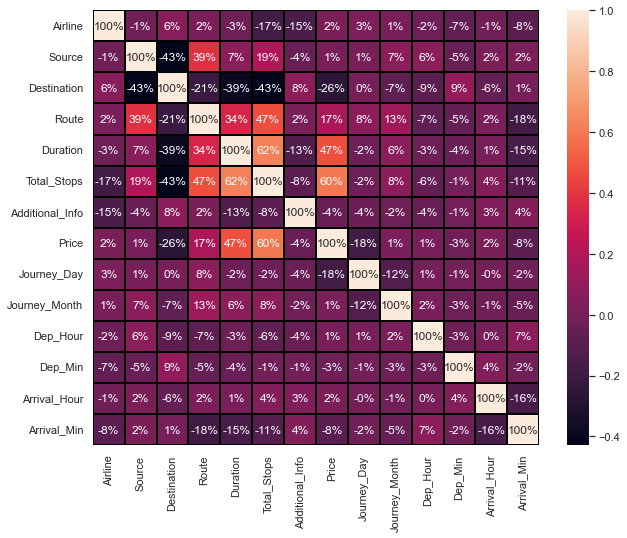

In [152]:
plt.figure(figsize=(10,8))
sns.heatmap(df_1.corr(),annot=True,linewidth=0.01,linecolor='black',fmt='0.0%')

# Visualizing the correlation using bar plot:-

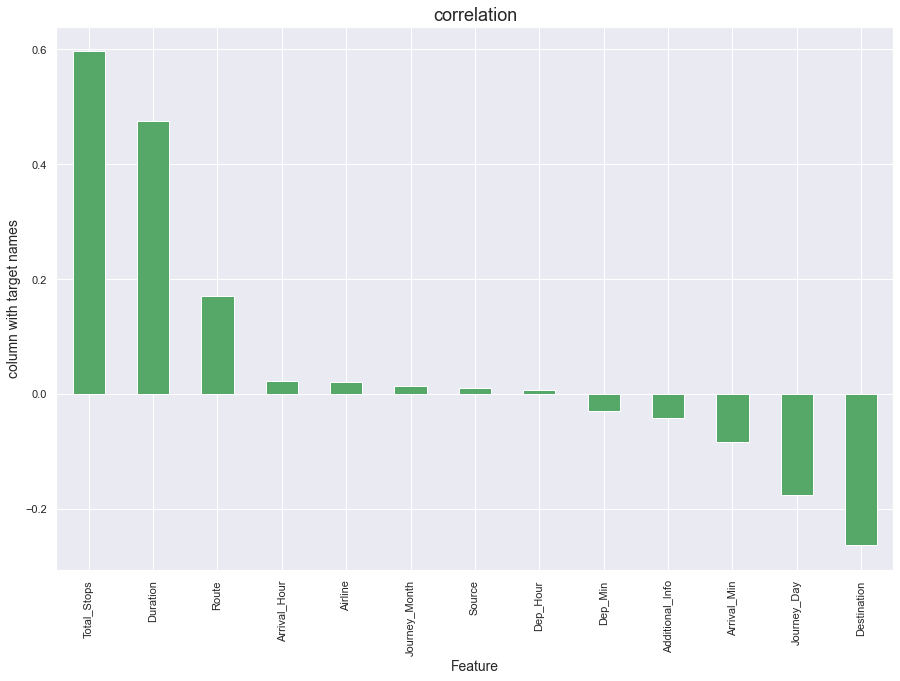

In [153]:
plt.figure(figsize=(15,10))
df_1.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# ii) Test dataset:

In [154]:
dff.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [155]:
dff.shape

(2671, 10)

In [156]:
print('This dataset has {} observations with {} features.'.format(dff.shape[0], df.shape[1]))

This dataset has 2671 observations with 14 features.


In [157]:
dff.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [158]:
dff.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

Here all the columns are object type data.

In [159]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


We can see there is no null values present

In [160]:
dff.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

These are the unique values for each columns

In [161]:
for i in dff.columns:
        print(dff[i].value_counts())
        print('*******************')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
*******************
9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/05/2019     65
27/03/2019     65
1/05/2019      62
3/03/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019     41
01/03/2019     34
15/03/2019     

# Checking null values:-

In [162]:
dff.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

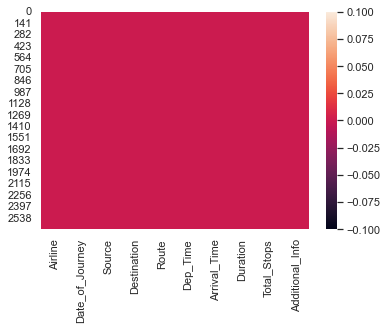

In [163]:
sns.heatmap(dff.isnull())
plt.show()

there is no null values are present inside the dataset

# Feature Extraction:-

As like Trian dataset here also we have to do extraction

In [164]:
#Converting object data type to datetime 
dff['Date_of_Journey']=pd.to_datetime(dff['Date_of_Journey'])
dff['Dep_Time']=pd.to_datetime(dff['Dep_Time'])
dff['Arrival_Time']=pd.to_datetime(dff['Arrival_Time'])

In [165]:
dff.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

Object datatype change to datetime

In [166]:
#Extracting day
dff["Journey_Day"]=pd.to_datetime(dff.Date_of_Journey, format="%d/%m/%Y").dt.day
#Extracting month
dff["Journey_Month"]=pd.to_datetime(dff.Date_of_Journey, format="%d/%m/%Y").dt.month
#Extracting year
dff["Journey_Year"]=pd.to_datetime(dff.Date_of_Journey, format="%d/%m/%Y").dt.year

In [167]:
dff

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Year
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2022-06-29 17:30:00,2022-06-07 04:25:00,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2022-06-29 06:20:00,2022-06-29 10:20:00,4h,1 stop,No info,5,12,2019
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2022-06-29 19:15:00,2022-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2022-06-29 08:00:00,2022-06-29 21:00:00,13h,1 stop,No info,21,5,2019
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2022-06-29 23:55:00,2022-06-25 02:45:00,2h 50m,non-stop,No info,24,6,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,2022-06-29 20:30:00,2022-06-07 20:25:00,23h 55m,1 stop,No info,6,6,2019
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2022-06-29 14:20:00,2022-06-29 16:55:00,2h 35m,non-stop,No info,27,3,2019
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2022-06-29 21:50:00,2022-03-07 04:25:00,6h 35m,1 stop,No info,3,6,2019
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2022-06-29 04:00:00,2022-06-29 19:15:00,15h 15m,1 stop,No info,3,6,2019


There is no need of Date_of_Journey column,so we have drop that column 

In [ ]:
dff=dff.drop(["Date_of_Journey"],axis=1)

In [170]:
dff

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2022-06-29 17:30:00,2022-06-07 04:25:00,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,2022-06-29 06:20:00,2022-06-29 10:20:00,4h,1 stop,No info,5,12,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2022-06-29 19:15:00,2022-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,2022-06-29 08:00:00,2022-06-29 21:00:00,13h,1 stop,No info,21,5,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,2022-06-29 23:55:00,2022-06-25 02:45:00,2h 50m,non-stop,No info,24,6,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,2022-06-29 20:30:00,2022-06-07 20:25:00,23h 55m,1 stop,No info,6,6,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2022-06-29 14:20:00,2022-06-29 16:55:00,2h 35m,non-stop,No info,27,3,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2022-06-29 21:50:00,2022-03-07 04:25:00,6h 35m,1 stop,No info,3,6,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,2022-06-29 04:00:00,2022-06-29 19:15:00,15h 15m,1 stop,No info,3,6,2019


This perticular Duration column is the difference between Arrival_time and Dep_time but the given Duration is not in format (i.e.,-h-m) so let me extract proper duration column from the Arrival_time and Dep_time.

In [171]:
Difference=(dff["Arrival_Time"]-dff["Dep_Time"])
Difference_list=list()
for i in range(len(Difference)):
    duration=Difference.iloc[i].seconds/3600
    Difference_list.append(duration)
dff["Duration"]=Difference_list

In [172]:
#Extracting Dep_time
dff["Dep_Hour"]=pd.to_datetime(dff["Dep_Time"]).dt.hour
dff["Dep_Min"]=pd.to_datetime(dff["Dep_Time"]).dt.minute

In [173]:
dff = dff.drop(["Dep_Time"],axis=1)

In [174]:
#Extracting Arrival_Time
dff["Arrival_Hour"]=pd.to_datetime(dff["Arrival_Time"]).dt.hour
dff["Arrival_Min"]=pd.to_datetime(dff["Arrival_Time"]).dt.minute

In [175]:
dff = dff.drop(["Arrival_Time"],axis=1)

In [176]:
dff.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1 stop,No info,6,6,2019,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4.000000,1 stop,No info,5,12,2019,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1 stop,In-flight meal not included,21,5,2019,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1 stop,No info,21,5,2019,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,non-stop,No info,24,6,2019,23,55,2,45


In [177]:
for i in dff.columns:
        print(dff[i].value_counts())
        print('*************************')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
*************************
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
*************************
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
*************************
DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                

we can see in journey year column there is only one value i.e 2019 as we kno this dataet is for 2019 soo we have to delete that column

In [178]:
dff = dff.drop(["Journey_Year"],axis=1)

In [180]:
dff.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4.000000,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,non-stop,No info,24,6,23,55,2,45


# Feature Engineering:-

In [181]:
#Feature["Airline"]
dff["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)
dff["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)
dff["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [183]:
#Destination
dff["Destination"].replace("New Delhi","Delhi",inplace=True)

In [184]:
#Additional_info
dff["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)
dff["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)
dff["Additional_Info"].replace("No Info","No info",inplace=True)

In [185]:
#total_stops
dff.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace = True)

In [186]:
dff.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4.000000,1,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,0,No info,24,6,23,55,2,45


# Data description:-

In [187]:
dff.describe()

,Duration,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,8.308187,0.833396,12.026956,5.607263,12.603519,24.891426,13.585174,24.558218
std,6.331450,0.672315,8.564408,3.042952,5.686673,19.086522,7.040396,16.775436
min,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.833333,0.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,6.500000,1.000000,6.000000,5.000000,12.000000,25.000000,15.000000,25.000000
75%,12.583333,1.000000,21.000000,6.000000,18.000000,45.000000,19.000000,35.000000
max,23.916667,4.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


# Checking for outliers:-

Duration            AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total_Stops      AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Journey_Day       AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Journey_Month    AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Dep_Hour         AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Dep_Min             AxesSubplot(0.125,0.593621;0.133621x0.130172)
Arrival_Hour     AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Arrival_Min       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
dtype: object

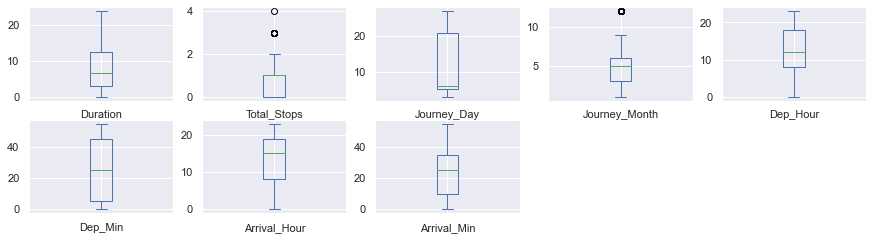

In [189]:
dff.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,10))

# Removing Outliers:-

# i) Uing Zscore method:-

In [190]:
features=dff[['Journey_Month']]

there is only one feature

In [191]:
from scipy.stats import zscore

In [192]:
z=np.abs(zscore(features))
dff_new=dff[(z<3).all(axis=1)]
dff_new

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4.000000,1,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,0,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23.916667,1,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2.583333,0,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6.583333,1,No info,3,6,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15.250000,1,No info,3,6,4,0,19,15


In [193]:
dff_new.shape

(2671, 13)

In [194]:
dff.shape

(2671, 13)

As we can see here is no dataloss in zscore method which means it has not removed.

# ii) IQR (Inter Quantile Range) mathod:-

In [195]:
# 1st quantile
Q1=features.quantile(0.25)
# 3rd quantile
Q3=features.quantile(0.75)
# IQR
IQR=Q3 - Q1

dff_1=dff[~((dff<(Q1-1.5*IQR))|(dff>(Q3+1.5 *IQR))).any(axis=1)]

I have removed the skewness using IQR method.

In [196]:
dff_1.shape

(2414, 13)

We can see in my new dataset i have 2414 rows and 13 columns.

In [197]:
dff.shape

(2671, 13)

# % of data loss:-

In [198]:
Dataloss=(((2671-2414)/2671)*100)
Dataloss

9.621864470235867

In IQR method the data loss is less than 10% so i can use IQR method to remove outliers.

# Skewness Checking:-

In [199]:
dff_1.skew()

Duration         0.812134
Total_Stops      0.327634
Journey_Day      0.310730
Journey_Month    0.156564
Dep_Hour         0.107732
Dep_Min          0.126943
Arrival_Hour    -0.444721
Arrival_Min      0.096564
dtype: float64

We can see there is skewness in Duration.

# Removing skewness using yeo-johnson method:-

In [200]:
fea=["Duration"]

In [201]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')

In [202]:
dff_1[fea]=scaler.fit_transform(dff_1[fea].values)

In [203]:
dff_1[fea].skew()

Duration   -0.01338
dtype: float64

We can see The skewness has removed

<AxesSubplot:xlabel='Duration', ylabel='Density'>

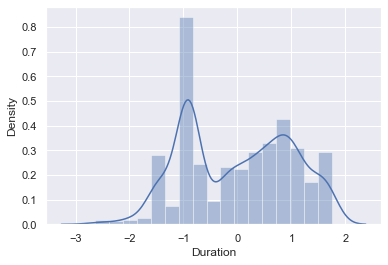

In [204]:
sns.distplot(dff_1['Duration'])

It looks like the skewness is reduced.

# Label Encoding:-

In [205]:
cat_col=[]
for i in dff_1.dtypes.index:
    if dff_1.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


These are the list of categorical columns in dff_1.

In [206]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
dff_1[cat_col]= dff_1[cat_col].apply(LE.fit_transform)

In [207]:
dff_1[cat_col].head()

,Airline,Source,Destination,Route,Additional_Info
0,4,2,1,70,5
2,4,2,1,70,2
3,5,2,1,70,5
4,0,0,2,14,5
7,3,3,0,52,5


Using label encoder i have encoded the categorical columns.

# Checking correlation:-

In [208]:
cor=dff_1.corr()

In [209]:
cor

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.025743,0.073316,0.006619,-0.055145,-0.192535,-0.149410,0.007439,-0.002283,0.009846,-0.059759,-0.015035,-0.108238
Source,-0.025743,1.000000,-0.389236,0.330589,0.051402,0.183536,-0.036250,-0.025131,0.044850,0.069805,-0.049378,0.003893,-0.022964
Destination,0.073316,-0.389236,1.000000,-0.229631,-0.406966,-0.433933,0.083267,0.020449,-0.050412,-0.071824,0.104231,-0.035278,0.020444
Route,0.006619,0.330589,-0.229631,1.000000,0.360363,0.484534,0.040619,0.040341,0.129223,-0.123306,-0.036332,-0.000204,-0.225181
Duration,-0.055145,0.051402,-0.406966,0.360363,1.000000,0.633328,-0.121802,-0.052472,0.066728,-0.082031,-0.036776,-0.013730,-0.167460
Total_Stops,-0.192535,0.183536,-0.433933,0.484534,0.633328,1.000000,-0.069234,-0.038463,0.084167,-0.102686,-0.003003,0.034922,-0.118665
Additional_Info,-0.149410,-0.036250,0.083267,0.040619,-0.121802,-0.069234,1.000000,-0.041788,0.033281,-0.062081,0.019532,0.011078,0.022466
Journey_Day,0.007439,-0.025131,0.020449,0.040341,-0.052472,-0.038463,-0.041788,1.000000,-0.111535,-0.011166,-0.021626,0.017975,-0.017399
Journey_Month,-0.002283,0.044850,-0.050412,0.129223,0.066728,0.084167,0.033281,-0.111535,1.000000,-0.029400,-0.009782,0.010870,-0.026181
Dep_Hour,0.009846,0.069805,-0.071824,-0.123306,-0.082031,-0.102686,-0.062081,-0.011166,-0.029400,1.000000,-0.041386,-0.000559,0.068546


<AxesSubplot:>

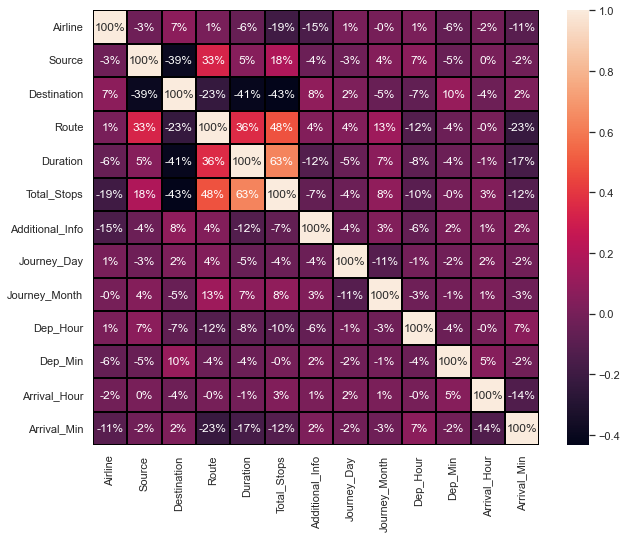

In [212]:
plt.figure(figsize=(10,8))
sns.heatmap(dff_1.corr(),annot=True,linewidth=0.01,linecolor='black',fmt='0.0%')

There is no multicolinearity issue in any features.

# Scaling the data using standard scaler:-

In [213]:
from sklearn.preprocessing import StandardScaler

In [215]:
scaler=StandardScaler()
X_1=pd.DataFrame(scaler.fit_transform(dff_1), columns=dff_1.columns)

I have scaled my data using standard scaler.

In [216]:
X_1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.243561,0.042047,-0.184755,0.784578,0.679728,0.258811,0.463204,-0.778303,0.460712,0.787794,0.270961,-1.357442,0.016725
1,0.243561,0.042047,-0.184755,0.784578,1.735062,0.258811,-2.246426,0.948874,0.031473,1.140228,-0.512706,0.768368,-1.467637
2,0.825697,0.042047,-0.184755,0.784578,0.909146,0.258811,0.463204,0.948874,0.031473,-0.798160,-1.296373,1.051809,-1.467637
3,-2.084982,-1.649655,0.845266,-1.413788,-0.885227,-1.228737,0.463204,1.294310,0.460712,1.845097,1.577073,-1.640883,1.204215
4,-0.338574,0.887898,-1.214777,0.077960,-0.221330,0.258811,0.463204,-0.893448,-1.685484,0.435360,-0.512706,0.910089,0.313598


# Checking for multicolinearity issue using VIF:-

In [217]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [218]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

,vif_Features,Features
0,1.108317,Airline
1,1.353865,Source
2,1.540213,Destination
3,1.582325,Route
4,1.873648,Duration
5,2.150076,Total_Stops
6,1.068353,Additional_Info
7,1.028633,Journey_Day
8,1.032979,Journey_Month
9,1.048960,Dep_Hour


There is no multicolinearity issue in this dataset.

# Model Building for Train Dataset:-

# Separating features and label in train dataset:-

In [219]:
x=df_1.drop("Price",axis=1)
y=df_1["Price"]

# Scaling the data using standard scaler:-

In [220]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [221]:
X.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,-0.341739,-1.669916,0.813802,-1.561573,-0.848535,-1.215953,0.504758,1.190880,-0.825893,1.662506,-0.225703,-1.789294,-0.887038
1,-1.459531,0.906072,-1.178405,0.206403,0.232876,1.748418,0.504758,-0.948377,-1.695886,-1.295187,1.375647,-0.048504,-0.584070
2,0.217157,0.047409,-0.182302,1.175939,1.420381,1.748418,0.504758,-0.835785,1.784083,-0.599259,0.041189,-1.354097,0.021868
3,-0.341739,-1.669916,0.813802,-1.247899,-0.290740,0.266233,0.504758,-1.173562,-1.695886,0.618614,1.375647,1.112022,0.627805
4,1.334949,0.906072,-1.178405,-0.363911,-1.006944,-1.215953,0.504758,1.190880,0.479095,-0.599259,-1.293269,-0.338636,0.021868


This is the data of independent variables after scaling.

# Checking for multicolinearity issue using VIF:-

In [222]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.095758,Airline
1,1.484266,Source
2,1.595172,Destination
3,1.621352,Route
4,1.802937,Duration
5,2.099914,Total_Stops
6,1.063287,Additional_Info
7,1.031428,Journey_Day
8,1.039366,Journey_Month
9,1.032383,Dep_Hour


There is no multicolinearity issue in this dataset.

# Finding Best Random State and Accuracy:-

In [227]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [229]:
maxAccu=0
maxRS=0
for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    rfc=RandomForestRegressor()
    rfc.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    print('accuracy : ',acc,'random state :',i)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

accuracy :  0.9172692003523001 random state : 1
accuracy :  0.919955977239733 random state : 2
accuracy :  0.9576741406559844 random state : 3
accuracy :  0.9260268487292831 random state : 4
accuracy :  0.9563368382598614 random state : 5
accuracy :  0.9439244593838808 random state : 6
accuracy :  0.9404801288227036 random state : 7
accuracy :  0.9591347335968341 random state : 8
accuracy :  0.9601017808122291 random state : 9
accuracy :  0.9548661724613018 random state : 10
accuracy :  0.9363643509806876 random state : 11
accuracy :  0.9182759913617582 random state : 12
accuracy :  0.9265089162519012 random state : 13
accuracy :  0.9665941680015384 random state : 14
accuracy :  0.949853624912675 random state : 15
accuracy :  0.9637342910130812 random state : 16
accuracy :  0.9345387904138124 random state : 17
accuracy :  0.9424410973699848 random state : 18
accuracy :  0.9299979017232944 random state : 19
accuracy :  0.9300645037704095 random state : 20
accuracy :  0.9253040912858541 

In [230]:
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9665941680015384  on Random_state  14


I got the best accuracy and random state.

# Creating train test split:-

In [231]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

# Regression Algorithms:-

In [233]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# RandomForestRegressor:-

In [234]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8515852535758313
mean_squared_error: 2989028.714873175
mean_absolute_error: 716.9321138771935
root_mean_squared_error: 1728.880769420834


# ExtraTreeRegressor:-

In [235]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8702023892251041
mean_squared_error: 2614085.1571398596
mean_absolute_error: 683.0063239661869
root_mean_squared_error: 1616.813272193131


# DecisionTreeRegressor:-

In [236]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7851771032640811
mean_squared_error: 4326469.049920036
mean_absolute_error: 804.3413296778615
root_mean_squared_error: 2080.016598472242


# KNN:-

In [237]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.6951297592782946
mean_squared_error: 6139995.693036326
mean_absolute_error: 1462.507950651131
root_mean_squared_error: 2477.9014695980804


# Gradient Boosting:-

In [238]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7902895377842875
mean_squared_error: 4223506.143928659
mean_absolute_error: 1298.7457473729387
root_mean_squared_error: 2055.117063315046


# Cross Validation Score:-

In [239]:
#for RandomForestRegressor
print(cross_val_score(RFR,X,y,cv=5).mean())

0.8856594136511541


In [240]:
#for ExtratreeRegressor
print(cross_val_score(ETR,X,y,cv=5).mean())

0.8908136566408389


In [241]:
#for Decisiontree Regressor
print(cross_val_score(DTR,X,y,cv=5).mean())

0.794953138792173


In [242]:
#for knn
print(cross_val_score(knn,X,y,cv=5).mean())

0.7095783253661011


In [243]:
#for Gradient boosting
print(cross_val_score(GBR,X,y,cv=5).mean())

0.8117057535597677


All the models are doing well.
Here  i got least difference for DTR so here this is the best model.

# Saving the model:-

In [255]:
import joblib
joblib.dump(DTR,"Flight_Price_prediction_project.pkl")

['Flight_Price_prediction_project.pkl']

i have saved my model named as 'Flight_Price_prediction_project.pkl'

# Lets Predicting the saved model:-

In [256]:
model=joblib.load("Flight_Price_prediction_project.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([17471., 16079.,  7480., ..., 13067.,  4423.,  4823.])

In [258]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"]).T

,Predicted,Actual
0,17471.0,17471.0
1,16079.0,16079.0
2,7480.0,7480.0
3,6104.0,6628.0
4,10676.0,10676.0
...,...,...
2913,6152.0,6253.0
2914,10844.0,9663.0
2915,13067.0,13067.0
2916,4423.0,3943.0


We can see Above are the predicted values and the actual values.They are almost similar.

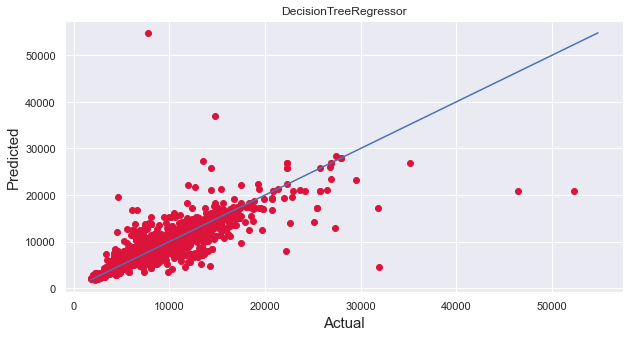

In [259]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("DecisionTreeRegressor")
plt.show()

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values.